In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 11.5 MB/s eta 0:00:00


Episode 0, Average Reward: -397.00, Epsilon: 0.99
Episode 1000, Average Reward: -124.13, Epsilon: 0.01
Episode 2000, Average Reward: -2.63, Epsilon: 0.01
Episode 3000, Average Reward: 6.90, Epsilon: 0.01
Episode 4000, Average Reward: 7.55, Epsilon: 0.01
Episode 5000, Average Reward: 7.38, Epsilon: 0.01
Episode 6000, Average Reward: 7.29, Epsilon: 0.01
Episode 7000, Average Reward: 7.43, Epsilon: 0.01
Episode 8000, Average Reward: 7.48, Epsilon: 0.01
Episode 9000, Average Reward: 7.50, Epsilon: 0.01


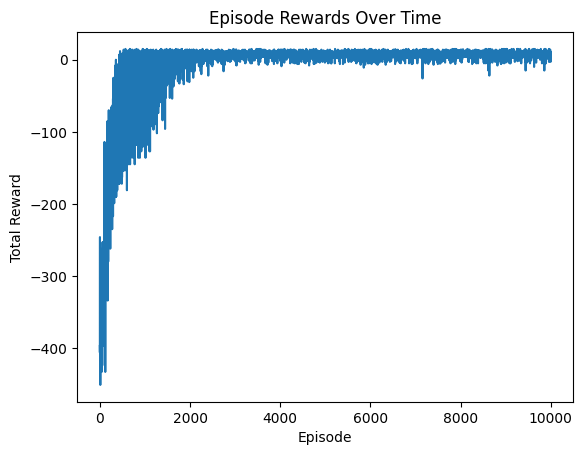

Optimal Q-Table:
[[ 0.          0.          0.          0.          0.          0.        ]
 [-4.57333876 -3.46213577 -4.54025739 -2.17830767  7.97650967 -9.41764423]
 [-0.89926169 -1.93230542  0.41816939  1.862443   14.11788949 -6.51946373]
 ...
 [ 1.22032539 15.15444311 -0.83963411 -1.69769206 -6.83016214 -4.08875108]
 [-3.76765182 -3.6919178  -3.67737842 -3.74279387 -5.15249259 -6.65985825]
 [-0.3439     -0.1099     -0.271       7.53721525 -1.91881    -2.48122781]]


In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define parameters and initialize Q-table
def initialize_parameters(env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.01,\
                          epsilon_decay=0.995, n_episodes=10000, max_steps=100):
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    Q_table = np.zeros((n_states, n_actions))

    return {
        "Q_table": Q_table,
        "alpha": alpha,
        "gamma": gamma,
        "epsilon": epsilon,
        "epsilon_min": epsilon_min,
        "epsilon_decay": epsilon_decay,
        "n_episodes": n_episodes,
        "max_steps": max_steps,
        "n_actions": n_actions,
        "n_states": n_states
    }

# Step 2: Epsilon-greedy policy
def epsilon_greedy(state, Q_table, epsilon, n_actions):
    if np.random.random() < epsilon:
        return np.random.randint(n_actions)  # Explore
    else:
        return np.argmax(Q_table[state])  # Exploit

# Step 3: SARSA update rule
def sarsa_update(Q_table, state, action, reward, next_state, next_action, alpha, gamma):
    predict = Q_table[state, action]
    target = reward + gamma * Q_table[next_state, next_action]
    Q_table[state, action] += alpha * (target - predict)

# Step 4: Train agent with SARSA
def train_agent(env, params):
    Q_table = params['Q_table']
    epsilon = params['epsilon']
    rewards = []
    for episode in range(params['n_episodes']):
        state, _ = env.reset()
        action = epsilon_greedy(state, Q_table, epsilon, params['n_actions'])
        total_reward = 0
        done = False

        for _ in range(params['max_steps']):
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy(next_state, Q_table, epsilon, params['n_actions'])

            sarsa_update(Q_table, state, action, reward, next_state, next_action, params['alpha'], params['gamma'])

            state = next_state
            action = next_action
            total_reward += reward

            if done:
                break

        # Decay epsilon to reduce exploration over time
        if epsilon > params['epsilon_min']:
            epsilon *= params['epsilon_decay']

        rewards.append(total_reward)

        if episode % 1000 == 0:
            avg_reward = np.mean(rewards[-1000:])
            print(f"Episode {episode}, Average Reward: {avg_reward:.2f}, Epsilon: {epsilon:.2f}")

    return Q_table, rewards

# Step 5: Visualize training progress
def plot_results(rewards):
    plt.plot(rewards)
    plt.title("Episode Rewards Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.show()

if __name__ == '__main__':
    # Initialize environment
    env = gym.make("Taxi-v3", render_mode="rgb_array")

    # Initialize parameters
    params = initialize_parameters(env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_min=0.01, epsilon_decay=0.995, n_episodes=10000, max_steps=100)

    # Train the SARSA agent
    Q_table, rewards = train_agent(env, params)

    # Visualize the results
    plot_results(rewards)

    # Print the optimal policy
    print("Optimal Q-Table:")
    print(Q_table)
